In [0]:
このデータは32×32×3のカラー画像で、10個のクラスから構成されています。
飛行機、自動車、鳥、猫、鹿、犬、カエル、ウマ、船、トラックの10個のクラスからなります。まずはそれを見てみます。


In [1]:
# -*- coding: utf-8 -*-
#-*- coding: cp950 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from typing import *

import torch
import torch.optim as optim

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *
from fastai.core import *

import tensorflow as tf
import random as rn
np.random.seed(0)
rn.seed(0)

import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

from keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')
import cv2

from keras.applications import ResNet50
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
os.listdir()

['.ipynb_checkpoints',
 '00Food-11K  Recognition VGG16 OK .ipynb',
 'AI 李宏毅 - HackMD UV.pdf',
 'AI 李宏毅 - HackMD UV2.pdf',
 'cosmos',
 'sakura',
 'simple CNN.ipynb',
 'Transfer Learning  CNN計算 J.pdf',
 'Transfer Learning  feature extraction logistic J.pdf',
 'Transfer Learning  GBT J.pdf',
 'Transfer Learning  logistic J UV.pdf',
 'Transfer Learning  logistic J.pdf',
 'Transfer Learning  傅立葉計算1 J.pdf',
 'Transfer Learning  傅立葉計算2 J.pdf',
 'Transfer Learning  傅立葉計算3 J.pdf',
 'Transfer Learning  櫻花與波斯菊 J.pdf',
 'Transfer Learning  櫻花與波斯菊數據 J.pdf',
 'Transfer Learning  權重可視化 J.pdf',
 'Transfer Learning  權重可視化 J2.pdf']

In [2]:
#在colab下接入google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/My Drive'
#path = Path(base_dir +'/imgs4')  #imgs
path = Path(base_dir +'/DLtry')
path.mkdir(parents=True,exist_ok=True)
os.chdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 小数化
x_train = x_train / 255
x_test = x_test / 255

170500096/170498071 [==============================] - 2s 0us/step


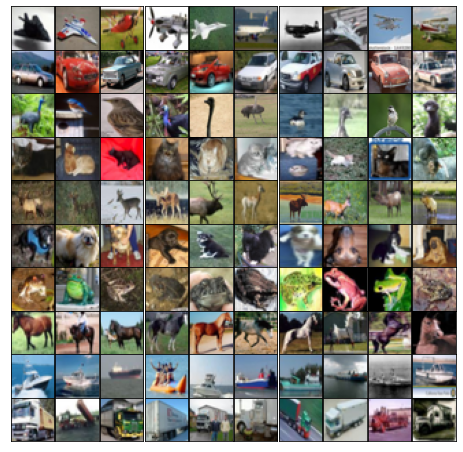

In [4]:
# ViewData
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0, wspace=0)
for i in range(10):
    index, cnt = 0, 0
    while(True):
        if y_train[index] == i:
            ax = fig.add_subplot(10, 10, i*10+cnt+1, xticks=[], yticks=[])
            ax.imshow(x_train[index])
            cnt += 1
        if cnt >= 10: break
        index += 1
plt.show()